In [8]:
!pip install bcb

ERROR: Could not find a version that satisfies the requirement bcb (from versions: none)
ERROR: No matching distribution found for bcb


ERROR: Could not find a version that satisfies the requirement bcb (from versions: none)
ERROR: No matching distribution found for bcb


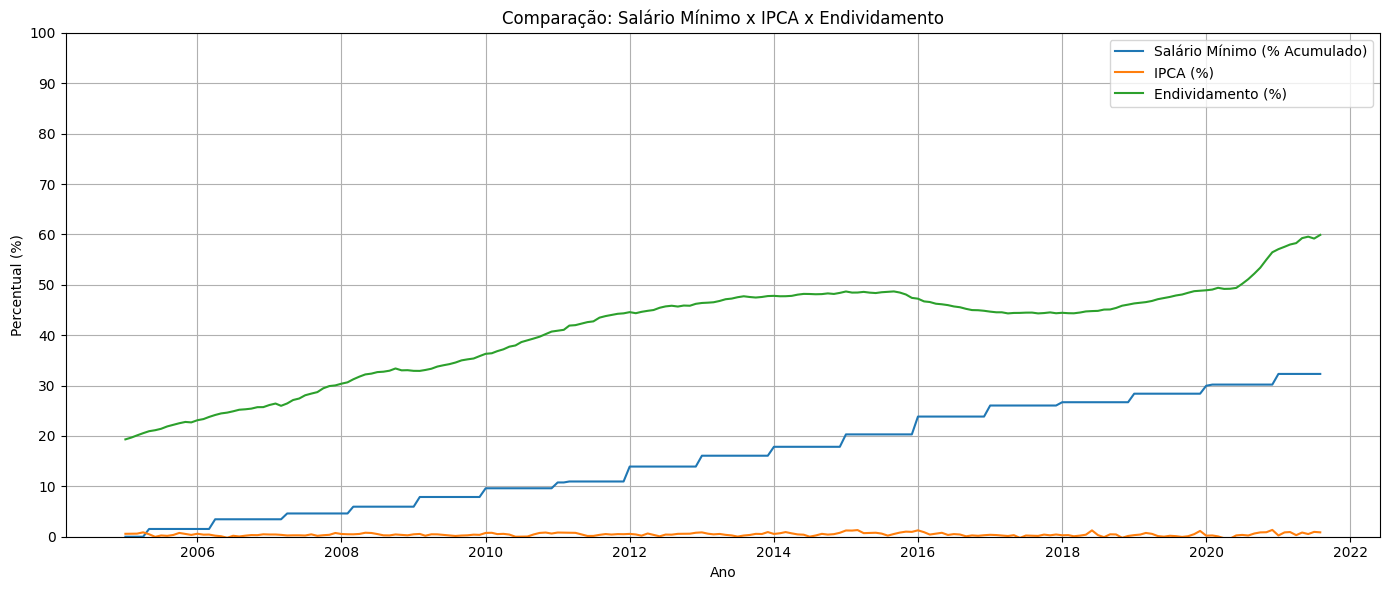

In [10]:
# Instalar a biblioteca necessária
!pip install bcb

# =======================
# 1. Imports
# =======================
import pandas as pd
from bcb import sgs
import matplotlib.pyplot as plt

# =======================
# 2. Coleta dos Dados
# =======================
# Salário Mínimo
salario_minimo = sgs.get({'salario_minimo': 1619}, start='1995-01-01').reset_index()
salario_minimo.columns = ['data', 'salario_minimo']

# IPCA
ipca = sgs.get({'ipca': 433}, start='1995-01-01').reset_index()
ipca.columns = ['data', 'ipca']

# Endividamento
endividamento = sgs.get({'endividamento': 19882}, start='1995-01-01').reset_index()
endividamento.columns = ['data', 'endividamento']

# =======================
# 3. Limpeza
# =======================
# Garantir formato de data
for df in [salario_minimo, ipca, endividamento]:
    df['data'] = pd.to_datetime(df['data'])
    df.dropna(inplace=True)

# =======================
# 4. Integração
# =======================
df_geral = pd.merge(salario_minimo, ipca, on='data', how='inner')
df_geral = pd.merge(df_geral, endividamento, on='data', how='inner')

# =======================
# 5. Transformações
# =======================
# Crescimento percentual acumulado do salário mínimo
valor_inicial = df_geral['salario_minimo'].iloc[0]
df_geral['salario_minimo_percentual'] = (df_geral['salario_minimo'] / valor_inicial - 1) * 10

# Média móvel do IPCA (opcional)
df_geral['ipca_mm12'] = df_geral['ipca'].rolling(window=12).mean()

# =======================
# 6. Visualização
# =======================
plt.figure(figsize=(14,6))
plt.plot(df_geral['data'], df_geral['salario_minimo_percentual'], label='Salário Mínimo (% Acumulado)')
plt.plot(df_geral['data'], df_geral['ipca'], label='IPCA (%)')
plt.plot(df_geral['data'], df_geral['endividamento'], label='Endividamento (%)')
plt.title('Comparação: Salário Mínimo x IPCA x Endividamento')
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.grid(True)
plt.ylim(0, 100) # Intervalo de 0 a 100 para facilitar a leitura
plt.yticks(range(0, 101, 10)) # De 10 em 10
plt.legend()
plt.tight_layout()
plt.show()

# =======================
# 7. Exportação
# =======================
# Seleciona as colunas finais
df_final = df_geral[['data', 'salario_minimo_percentual', 'ipca', 'ipca_mm12', 'endividamento']]
df_final.to_csv('dados_transformados.csv', index=False)
df_final.to_excel('dados_transformados.xlsx', index=False)
